In [1]:
import sys
path = "/home/mikhail/research/bench-mr/python"
if path not in sys.path:
    sys.path.append(path)

import os
os.environ["MPB_BINARY"] = "./benchmark"
os.environ["MPB_PYTHON_BINARY"] = "/home/mikhail/research/pytorch-motion-planner/scripts/run_bench_mr.py"
os.environ["MPB_BINARY_DIR"] = "/home/mikhail/research/bench-mr/bin"


import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

from plot_env import plot_env
import json
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats

%config InlineBackend.figure_format='retina'

# Run one experiment

In [3]:
m = MPB()
m["benchmark.moving_ai.active"] = True
m["benchmark.moving_ai.create_border"] = False
i = -1
m["benchmark.moving_ai.start"] = i
m["benchmark.moving_ai.end"] = i + 1
m["benchmark.moving_ai.scenario"] = '/home/mikhail/research/bench-mr/bin/moving_ai_scenarios/Berlin_0_256.map.scen' 

m["max_planning_time"] = 60
m["benchmark.planning"]['constrained_onf_planner'] = True
m["steer.car_turning_radius"] = 2
m["sbpl.scaling"] = 1
# m.set_planners(['constrained_onf_planner', 'bfmt', 'cforest', 'prm', 'prm_star', 'informed_rrt_star', 'sbpl_mha'])
# m.set_planners(['constrained_onf_planner', 'informed_rrt_star', 'sbpl_mha'])
m.set_planners(['constrained_onf_planner'])
m.run(id="movingai", runs=1)

Running MPB with ID movingai (log file at movingai.log)...


movingai:   0%|          | 0/1 [00:00<?, ?it/s]

0

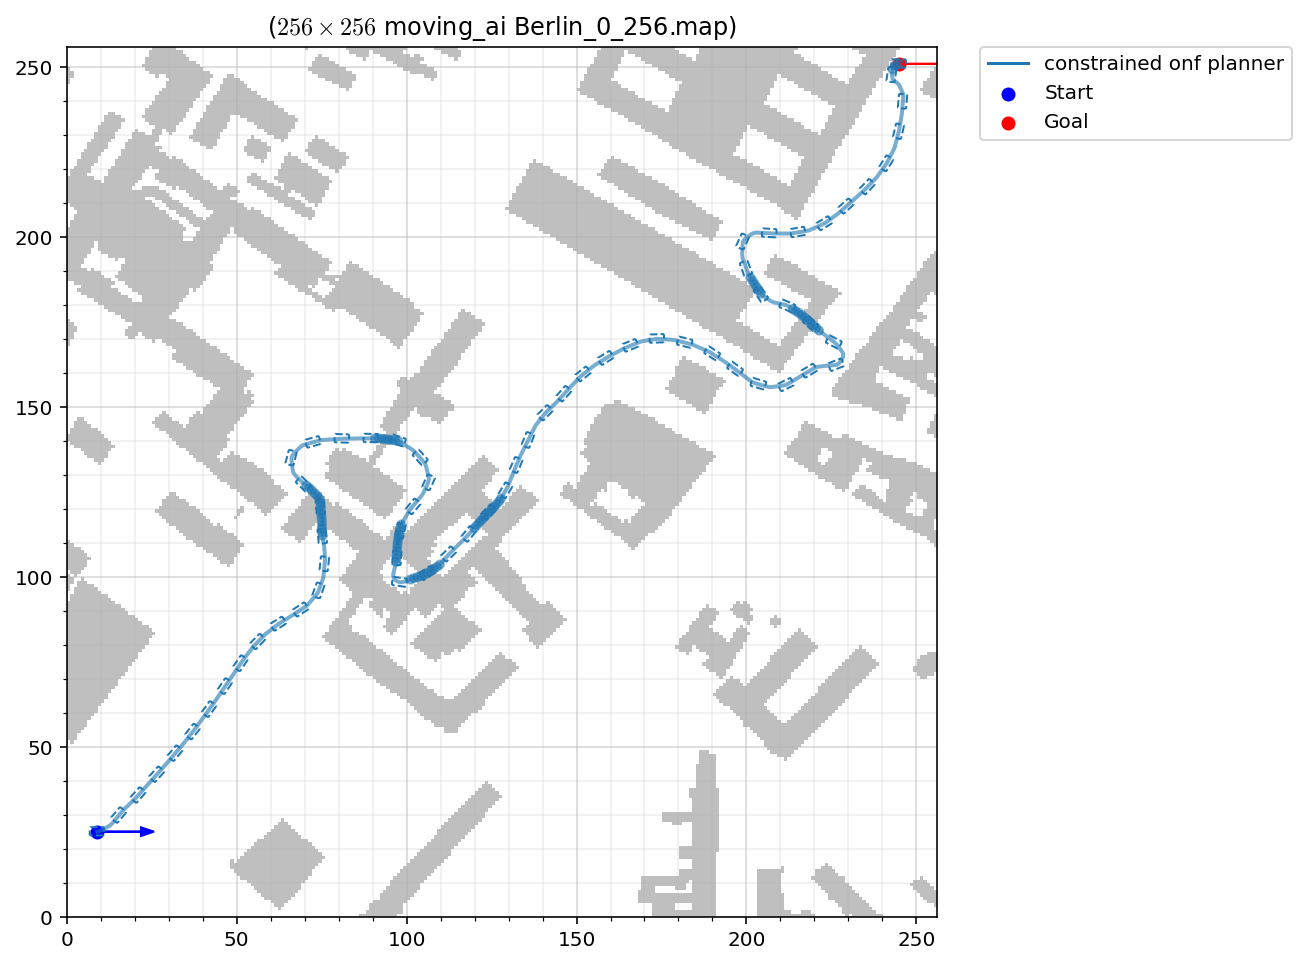

In [4]:
m.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/movingai_experiment.pdf",
                         num_colors=10)

Available memory: 15.01 GB, limiting each MPB process to 41.7% usage (6.25 GB).
Creating pool of 4 processes.
Running MPB with ID polygons_1 (log file at polygons/polygons_1.log)...Running MPB with ID polygons_0 (log file at polygons/polygons_0.log)...Running MPB with ID polygons_2 (log file at polygons/polygons_2.log)...Running MPB with ID polygons_3 (log file at polygons/polygons_3.log)...





polygons_2:   0%|          | 0/1 [00:00<?, ?it/s]

polygons_3:   0%|          | 0/1 [00:00<?, ?it/s]

polygons_0:   0%|          | 0/1 [00:00<?, ?it/s]

polygons_1:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 2 (polygons_2) finished successfully.
Running MPB with ID polygons_4 (log file at polygons/polygons_4.log)...Benchmark 3 (polygons_3) finished successfully.

Running MPB with ID polygons_5 (log file at polygons/polygons_5.log)...


polygons_4:   0%|          | 0/1 [00:00<?, ?it/s]

polygons_5:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 1 (polygons_1) finished successfully.
Running MPB with ID polygons_6 (log file at polygons/polygons_6.log)...


polygons_6:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 0 (polygons_0) finished successfully.
Running MPB with ID polygons_7 (log file at polygons/polygons_7.log)...


polygons_7:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 5 (polygons_5) finished successfully.
Running MPB with ID polygons_8 (log file at polygons/polygons_8.log)...


polygons_8:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 7 (polygons_7) finished successfully.
Running MPB with ID polygons_9 (log file at polygons/polygons_9.log)...
Benchmark 6 (polygons_6) finished successfully.


polygons_9:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 4 (polygons_4) finished successfully.
Benchmark 8 (polygons_8) finished successfully.
Benchmark 9 (polygons_9) finished successfully.
All benchmarks succeeded.


True

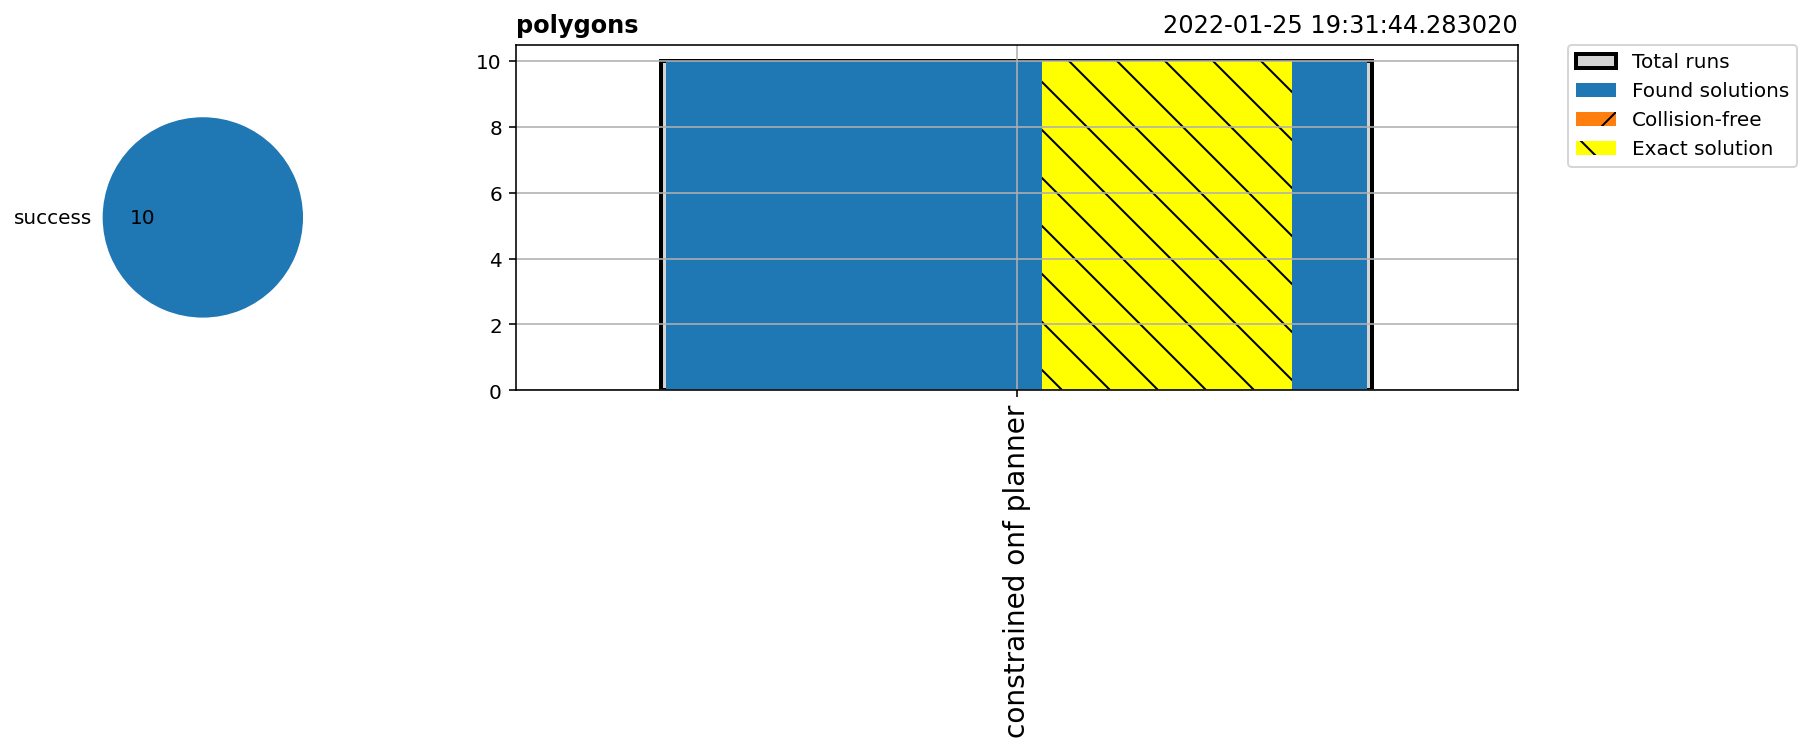

In [2]:
env = os.environ
env["MPLBACKEND"] = "TkAgg"
pool = MultipleMPB()
for i in range(10):
    m = MPB()
    m["benchmark.moving_ai.active"] = True
    m["benchmark.moving_ai.create_border"] = False
    m["benchmark.moving_ai.start"] = -i - 1
    m["benchmark.moving_ai.end"] = -i
    m["benchmark.moving_ai.scenario"] = '/home/mikhail/research/bench-mr/bin/moving_ai_scenarios/Berlin_0_256.map.scen' 

    m["max_planning_time"] = 60
    m["benchmark.planning"]['constrained_onf_planner'] = True
    m["steer.car_turning_radius"] = 2
    m["sbpl.scaling"] = 1
    m.set_planners(['constrained_onf_planner'])
    pool.benchmarks.append(m)

pool.run_parallel(id="polygons", runs=1, processes=4)

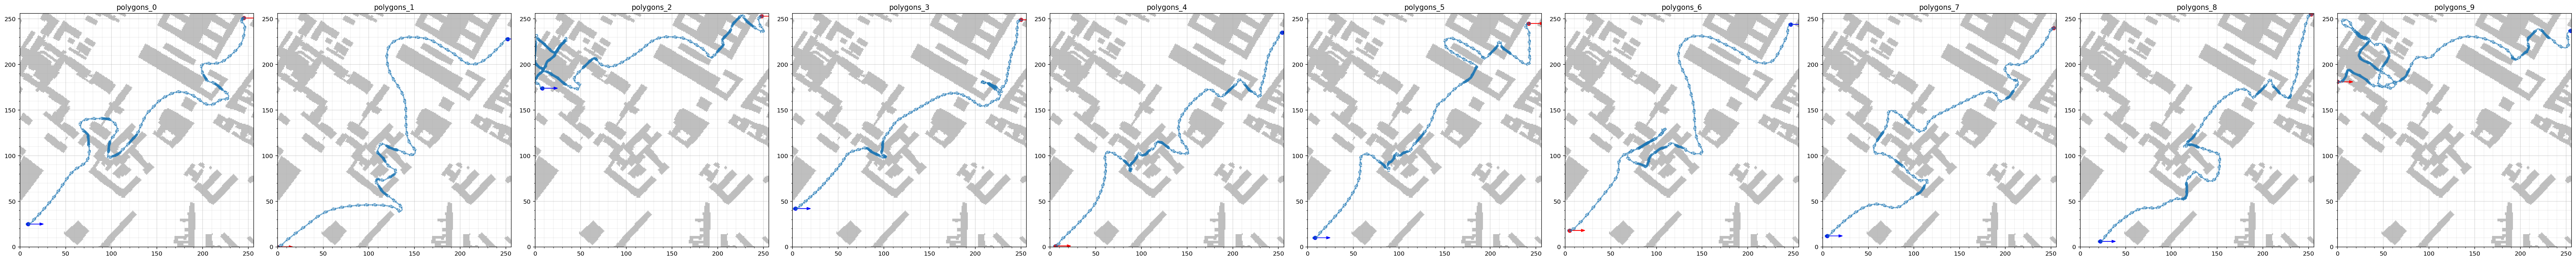

In [3]:
pool.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/movingai_experiment_pool.pdf",
                         num_colors=10)